# 回归模型

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 使用numpy生成200个随机的数据点

生成从-0.5到0.5均匀分布的200个数据点，包含首尾数据

In [2]:
x_data = np.linspace(-0.5, 0.5, 200) 

In [3]:
x_data

array([-0.5       , -0.49497487, -0.48994975, -0.48492462, -0.4798995 ,
       -0.47487437, -0.46984925, -0.46482412, -0.45979899, -0.45477387,
       -0.44974874, -0.44472362, -0.43969849, -0.43467337, -0.42964824,
       -0.42462312, -0.41959799, -0.41457286, -0.40954774, -0.40452261,
       -0.39949749, -0.39447236, -0.38944724, -0.38442211, -0.37939698,
       -0.37437186, -0.36934673, -0.36432161, -0.35929648, -0.35427136,
       -0.34924623, -0.34422111, -0.33919598, -0.33417085, -0.32914573,
       -0.3241206 , -0.31909548, -0.31407035, -0.30904523, -0.3040201 ,
       -0.29899497, -0.29396985, -0.28894472, -0.2839196 , -0.27889447,
       -0.27386935, -0.26884422, -0.2638191 , -0.25879397, -0.25376884,
       -0.24874372, -0.24371859, -0.23869347, -0.23366834, -0.22864322,
       -0.22361809, -0.21859296, -0.21356784, -0.20854271, -0.20351759,
       -0.19849246, -0.19346734, -0.18844221, -0.18341709, -0.17839196,
       -0.17336683, -0.16834171, -0.16331658, -0.15829146, -0.15

将1维数据升成2维数据

In [4]:
x_data = x_data[:, np.newaxis]

In [5]:
x_data

array([[-0.5       ],
       [-0.49497487],
       [-0.48994975],
       [-0.48492462],
       [-0.4798995 ],
       [-0.47487437],
       [-0.46984925],
       [-0.46482412],
       [-0.45979899],
       [-0.45477387],
       [-0.44974874],
       [-0.44472362],
       [-0.43969849],
       [-0.43467337],
       [-0.42964824],
       [-0.42462312],
       [-0.41959799],
       [-0.41457286],
       [-0.40954774],
       [-0.40452261],
       [-0.39949749],
       [-0.39447236],
       [-0.38944724],
       [-0.38442211],
       [-0.37939698],
       [-0.37437186],
       [-0.36934673],
       [-0.36432161],
       [-0.35929648],
       [-0.35427136],
       [-0.34924623],
       [-0.34422111],
       [-0.33919598],
       [-0.33417085],
       [-0.32914573],
       [-0.3241206 ],
       [-0.31909548],
       [-0.31407035],
       [-0.30904523],
       [-0.3040201 ],
       [-0.29899497],
       [-0.29396985],
       [-0.28894472],
       [-0.2839196 ],
       [-0.27889447],
       [-0

生成噪声数据与`x_data`的shape一致

In [6]:
noise = np.random.normal(0, 0.02,  x_data.shape)

noise为均值为0，方差为0.02的高斯分布

In [7]:
noise

array([[-2.34918953e-02],
       [-3.01627861e-02],
       [ 7.31385521e-03],
       [-8.98332949e-03],
       [ 1.14444497e-02],
       [ 1.10872601e-02],
       [ 8.50827789e-03],
       [ 2.34167215e-03],
       [ 1.61163987e-02],
       [-2.22787735e-03],
       [ 2.08887291e-02],
       [ 4.58711551e-03],
       [-8.95024222e-03],
       [-1.08329478e-02],
       [-2.86516439e-02],
       [-2.59872176e-02],
       [ 1.54984427e-02],
       [-5.20946445e-03],
       [-2.01653091e-02],
       [ 1.50659789e-03],
       [ 3.33386647e-02],
       [ 2.66297793e-03],
       [-3.36524584e-04],
       [ 2.51196875e-02],
       [ 2.23867939e-02],
       [ 3.84549173e-03],
       [-1.46851889e-02],
       [ 8.57299533e-03],
       [-2.82813411e-02],
       [-1.11080816e-02],
       [-1.47624228e-02],
       [ 8.79385502e-03],
       [ 1.86138102e-02],
       [ 1.28156803e-02],
       [ 2.72197144e-03],
       [-2.54494571e-02],
       [-9.16188053e-03],
       [ 1.01468015e-02],
       [ 1.6

构建数据y_data

$y\_data = x\_data^2 + noise$

In [8]:
y_data = np.square(x_data) + noise

In [9]:
y_data

array([[ 0.2265081 ],
       [ 0.21483734],
       [ 0.24736461],
       [ 0.22616856],
       [ 0.24174798],
       [ 0.23659293],
       [ 0.22926659],
       [ 0.21840314],
       [ 0.22753151],
       [ 0.20459139],
       [ 0.22316266],
       [ 0.20236621],
       [ 0.18438452],
       [ 0.17810799],
       [ 0.15594597],
       [ 0.15431757],
       [ 0.19156092],
       [ 0.1666612 ],
       [ 0.14756404],
       [ 0.16514514],
       [ 0.19293691],
       [ 0.15827142],
       [ 0.15133263],
       [ 0.17290005],
       [ 0.16632887],
       [ 0.14399978],
       [ 0.12173182],
       [ 0.14130323],
       [ 0.10081262],
       [ 0.11440011],
       [ 0.10721051],
       [ 0.12728202],
       [ 0.13366772],
       [ 0.12448584],
       [ 0.11105888],
       [ 0.07960471],
       [ 0.09266004],
       [ 0.10878699],
       [ 0.11219907],
       [ 0.10373325],
       [ 0.07876585],
       [ 0.10244395],
       [ 0.10066073],
       [ 0.06630474],
       [ 0.08098576],
       [ 0

## 定义placeholder用于接收训练的数据

可以认为是输入层

In [10]:
x = tf.placeholder(tf.float32, [None, 1], name="x_input")
y = tf.placeholder(tf.float32, [None, 1], name="y_input")

In [11]:
x

<tf.Tensor 'x_input:0' shape=(?, 1) dtype=float32>

In [12]:
y

<tf.Tensor 'y_input:0' shape=(?, 1) dtype=float32>

定义隐藏层

即：

$$a_1 = w_1 \times x + b_1$$
$$out_1 = activation(a_1)$$

In [13]:
W_1 = tf.Variable(tf.random_normal([1, 10]))
b_1 = tf.Variable(tf.zeros([1, 10]))
a_1 = tf.matmul(x, W_1) + b_1
out_1 = tf.nn.tanh(a_1)

In [14]:
W_1

<tf.Variable 'Variable:0' shape=(1, 10) dtype=float32_ref>

In [15]:
b_1

<tf.Variable 'Variable_1:0' shape=(1, 10) dtype=float32_ref>

In [16]:
a_1

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [17]:
out_1

<tf.Tensor 'Tanh:0' shape=(?, 10) dtype=float32>

## 定义输出层

即输出变为维度为1的数据

$$a_2=out_1 \times w_2 + b_2$$
$$out_2 = activation(a_2)$$

In [18]:
W_2 = tf.Variable(tf.random_normal([10, 1]))
b_2 = tf.Variable(tf.zeros([1, 1]))
a_2 = tf.matmul(out_1, W_2) + b_2
out_2 = tf.nn.tanh(a_2)

In [19]:
W_2

<tf.Variable 'Variable_2:0' shape=(10, 1) dtype=float32_ref>

In [20]:
b_2

<tf.Variable 'Variable_3:0' shape=(1, 1) dtype=float32_ref>

In [21]:
a_2

<tf.Tensor 'add_1:0' shape=(?, 1) dtype=float32>

In [22]:
out_2

<tf.Tensor 'Tanh_1:0' shape=(?, 1) dtype=float32>

## 定义损失函数

In [23]:
loss = tf.reduce_mean(tf.square(out_2- y_data))

In [24]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [25]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [26]:
train_step

<tf.Operation 'GradientDescent' type=NoOp>

## 初始化变量

In [27]:
init = tf.global_variables_initializer()

In [28]:
init

<tf.Operation 'init' type=NoOp>

## 训练

In [29]:
with tf.Session() as sess:
    sess.run(init)
    for epc in range(10000):
        sess.run([loss, train_step], {x:x_data,y:y_data})
        if epc % 10 == 0:
 #           loss_value = sess.run([loss])
            loss_value = sess.run([loss], {x:x_data,y:y_data})

            print(epc, loss_value)
    prediction_value = sess.run(out_2, feed_dict={x:x_data})

0 [0.5895318]
10 [0.20922647]
20 [0.0060149524]
30 [0.1843556]
40 [0.1003089]
50 [0.13533525]
60 [0.12173258]
70 [0.11502971]
80 [0.10597257]
90 [0.09566488]
100 [0.08471802]
110 [0.073716804]
120 [0.0631451]
130 [0.053354483]
140 [0.044561643]
150 [0.036864456]
160 [0.030268965]
170 [0.02471658]
180 [0.020110523]
190 [0.016335653]
200 [0.013272908]
210 [0.010808831]
220 [0.008840564]
230 [0.0072781206]
240 [0.0060446877]
250 [0.0050758338]
260 [0.004318233]
270 [0.0037280833]
280 [0.0032696333]
290 [0.002913902]
300 [0.0026375009]
310 [0.0024217074]
320 [0.0022516712]
330 [0.0021157593]
340 [0.0020050034]
350 [0.0019125998]
360 [0.0018335049]
370 [0.0017640385]
380 [0.0017015848]
390 [0.0016443208]
400 [0.0015909949]
410 [0.0015407717]
420 [0.0014930917]
430 [0.0014475897]
440 [0.0014040194]
450 [0.0013622175]
460 [0.0013220676]
470 [0.0012834821]
480 [0.001246395]
490 [0.001210748]
500 [0.00117649]
510 [0.0011435741]
520 [0.0011119553]
530 [0.001081591]
540 [0.0010524383]
550 [0.0010

4280 [0.0003782572]
4290 [0.00037820052]
4300 [0.00037814397]
4310 [0.00037808807]
4320 [0.00037803204]
4330 [0.00037797636]
4340 [0.00037792086]
4350 [0.0003778654]
4360 [0.00037781044]
4370 [0.00037775596]
4380 [0.0003777013]
4390 [0.0003776469]
4400 [0.00037759286]
4410 [0.0003775389]
4420 [0.00037748553]
4430 [0.00037743192]
4440 [0.00037737883]
4450 [0.00037732578]
4460 [0.0003772731]
4470 [0.00037722068]
4480 [0.00037716818]
4490 [0.0003771158]
4500 [0.00037706408]
4510 [0.0003770126]
4520 [0.00037696102]
4530 [0.00037690997]
4540 [0.00037685892]
4550 [0.0003768077]
4560 [0.00037675735]
4570 [0.00037670718]
4580 [0.000376657]
4590 [0.00037660688]
4600 [0.00037655726]
4610 [0.00037650747]
4620 [0.0003764582]
4630 [0.0003764091]
4640 [0.00037635994]
4650 [0.00037631148]
4660 [0.00037626293]
4670 [0.00037621442]
4680 [0.00037616625]
4690 [0.0003761185]
4700 [0.00037607067]
4710 [0.00037602306]
4720 [0.00037597597]
4730 [0.00037592894]
4740 [0.00037588127]
4750 [0.00037583447]
4760 [

8410 [0.00036658204]
8420 [0.00036656932]
8430 [0.00036655672]
8440 [0.00036654412]
8450 [0.0003665314]
8460 [0.00036651883]
8470 [0.0003665063]
8480 [0.00036649362]
8490 [0.00036648128]
8500 [0.00036646894]
8510 [0.00036645617]
8520 [0.000366444]
8530 [0.00036643166]
8540 [0.0003664194]
8550 [0.00036640727]
8560 [0.00036639508]
8570 [0.00036638268]
8580 [0.00036637043]
8590 [0.00036635835]
8600 [0.00036634653]
8610 [0.00036633445]
8620 [0.0003663221]
8630 [0.0003663102]
8640 [0.00036629845]
8650 [0.00036628664]
8660 [0.00036627453]
8670 [0.00036626283]
8680 [0.000366251]
8690 [0.00036623905]
8700 [0.00036622756]
8710 [0.00036621577]
8720 [0.00036620413]
8730 [0.0003661923]
8740 [0.000366181]
8750 [0.0003661693]
8760 [0.00036615762]
8770 [0.00036614612]
8780 [0.00036613445]
8790 [0.00036612316]
8800 [0.00036611196]
8810 [0.0003661002]
8820 [0.00036608917]
8830 [0.00036607758]
8840 [0.0003660666]
8850 [0.0003660553]
8860 [0.00036604382]
8870 [0.00036603282]
8880 [0.00036602153]
8890 [0.

## 画图

In [30]:
prediction_value

array([[ 2.32277691e-01],
       [ 2.28782922e-01],
       [ 2.25278348e-01],
       [ 2.21764833e-01],
       [ 2.18243316e-01],
       [ 2.14714557e-01],
       [ 2.11179495e-01],
       [ 2.07639098e-01],
       [ 2.04094201e-01],
       [ 2.00545833e-01],
       [ 1.96994945e-01],
       [ 1.93442374e-01],
       [ 1.89889222e-01],
       [ 1.86336353e-01],
       [ 1.82784930e-01],
       [ 1.79235905e-01],
       [ 1.75690278e-01],
       [ 1.72149077e-01],
       [ 1.68613568e-01],
       [ 1.65084422e-01],
       [ 1.61563069e-01],
       [ 1.58050358e-01],
       [ 1.54547498e-01],
       [ 1.51055649e-01],
       [ 1.47575617e-01],
       [ 1.44108772e-01],
       [ 1.40656203e-01],
       [ 1.37218907e-01],
       [ 1.33798122e-01],
       [ 1.30394846e-01],
       [ 1.27010211e-01],
       [ 1.23645552e-01],
       [ 1.20301552e-01],
       [ 1.16979651e-01],
       [ 1.13680854e-01],
       [ 1.10406443e-01],
       [ 1.07157134e-01],
       [ 1.03934526e-01],
       [ 1.0

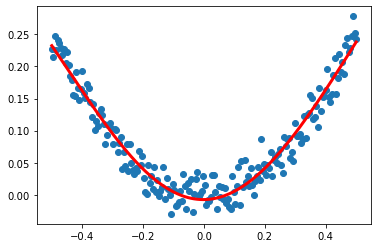

In [31]:
plt.figure()
plt.scatter(x_data, y_data)
plt.plot(x_data, prediction_value, "r-", lw=3)
plt.show()